# Recap Week 1 to 3

- Course environemtn (GitHub repository and Codespace)
- Jupyter notebook
- Import Python packages for data analysis
 - pandas
 - numpy
 - matplotlib
 - seaborn
- Variables and functions
- Data acquisition
 - DataFrame concept, index, columns, multi-level index
 - read_csv
 - read_excel
 - load_dataset (e.g. using seaborn titanic = sns.load_dataset('titanic'))
- EDA (exploratory data analysis)
 - check dataset size (len, info, shape)
 - get basic stats (info, describe)
- Data transformation / data cleanup
 - filtering using boolean mask
 - identifying outliers
 - finding missing data (.isnull())
 - replacing missing data (.fillna())
 - working with date format, extracting year, etc.
 - locating data by index, 
 - grouping data and aggregating data (e.g. df.groupby('work').agg({'age':'mean'}))
- Visualization
 - creating charts using seaborn 
 - creating multi-chart visuals (e.g. sns.catplot(x="alive", col="deck", col_wrap=4, data=titanic[titanic.deck.notnull()],kind="count", height=2.5,aspect=.8);)





# Data visualization discussion

🥦 <font color='red'>TODO</font>: Discuss with your classmates

1. When does it make sense to use a simple line chart?
2. When does it make sense to use a histogram chart?
3. When does it make sense to use a scatter plot?

Think about the story you want to tell with data?
- are you intersted in historical trends? (e.g. the return of investment of gold over the last decade)
- are you comparing 2 variables and trying to find a relationship between the 2? (e.g. your age and the price of your medical insurance)
- are you illustrating the distribution (e.g. annual performance rating of employess)
- are you trying to uncover biases? (e.g. someone who had a very strong preformance rating over the last 5 years and has consistenly increased her responsibilities but was never nominated for promotion)


# Week 4

- 🥦 Time Series
- 🌶️ Complex branded chart example (opitonal content)
- 🌶️ Data encryption (optional content)
- 🌶️ Web scraping (optional content)
 

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import matplotlib.ticker as mtick

from PIL import Image
import requests
from io import BytesIO


## 🥦 Time series

A Time Series is a particular type of dataset that contains data snapshots at regular internvals.

Here are a few examples:

- historical daily open and close prices of a stock
- heart rate measured by a wearable device such as a Fitbit or Apple Watch
- evolution of the percentage of women in managerial positions as monthly snapshots
- gps coordinates coming from a drone in flight
- daily number of visitors on a web site

From the different example, you can see that a time series can have different frequency (every day, every day except on bank holidays, every month, every millisecond, etc.)





Before going into Time Series, let's look at how Python processes dates.

Datetime documentation for date formatting:

https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior

In [22]:
from datetime import datetime

now = datetime.now()

now.day,now.month,now.year,now.weekday(),now.strftime('%d/%m/%Y')


(28, 3, 2023, 1, '28/03/2023')

In [23]:
# TODO, remove the hashtag sign below and run this cell.
# now.strftime('We are %A the %d, %b %Y') 


### Timestamp

Understanding the pandas' Timestamp object (datetime64 numpy dtype)

In [24]:
pd.to_datetime('15th of March, 2022')

Timestamp('2022-03-15 00:00:00')

In [25]:
pd.to_datetime('15-03-2022')

C:\Users\Sam\AppData\Local\Temp\ipykernel_12880\1464620401.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  pd.to_datetime('15-03-2022')


Timestamp('2022-03-15 00:00:00')

In [26]:
# method call chaining 
# step 1, get a Timestamp object
# step 2, format the Timestamp object using streftime
pd.to_datetime('28-06-1914').strftime('World War I started on a %A')

C:\Users\Sam\AppData\Local\Temp\ipykernel_12880\2958282049.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  pd.to_datetime('28-06-1914').strftime('World War I started on a %A')


'World War I started on a Sunday'

🥦 <font color='red'>TODO</font>: Define a funtion birthday that takes 3 parameters (day, month and year) and return "I was born on a XXXXXX" (where XXXXX is the day of the week when you were born).


For instance: 

```Pyton
birthday(12,5,1995) 
```

should return 

```
I was born on a Tuesday
```

Remember the syntax to write a funciton in Python:
- start with the def keywork
- then your funciton name
- then the function parameters in parenthesis
- then a column ":" at the end of the line
- then you need to indent (i.e. space out to the right) the body of the function
- and lastly, use the keywork "return" to return a value

```Python
def my_funciton(param1, param2):
    print("bla...")
    return 1
```





In [27]:
# write your code here
def birthday(d: int, m: int, y: int):

    return pd.to_datetime(f'{m}-{d}-{y}').day_name()

print('I was born on a', birthday(12, 5, 1996))
    

I was born on a Sunday


### Charting time series


* review: importing data
* review: adjusting the data types
* charting a time series
* adding a chart title
* adjusting the label of the x and y axis
* adding chart annotations
* adjusting the chart size

In [28]:

import matplotlib.pyplot as plt

In [29]:
import pandas as pd

df = pd.read_csv('https://bit.ly/3u39QFz')

# if your computer's firewall is blocking access to this url, you can also retrieve the file on your student gitlab
# the data file is on your gitlab in the data folder, file name: CAR.csv
# you download the file on your laptop, then replace the line above by
# df = pd.read_csv('CAR.csv')


🥦 <font color='red'>TODO</font>: Run a command to display a sample of 5 lines from the dataframe df


In [30]:
# add your code here
df.sample(5)

,timestamp,open,high,low,close,volume,symbol
2093,2011-09-28,10.93,11.08,10.26,10.27,1757900,CAR
3535,2006-01-06,17.33,17.39,17.23,17.25,37900000,CAR
3344,2006-10-10,19.10,19.20,18.83,18.83,681800,CAR
2885,2008-08-07,6.49,7.75,6.49,7.02,5990400,CAR
4094,2003-10-17,19.77,19.79,19.25,19.33,20785000,CAR


🥦 <font color='red'>TODO</font>: Run a command to find out how many rows of data in your dataframe and what are the different data types.


In [31]:
# add your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5033 entries, 0 to 5032
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  5033 non-null   object 
 1   open       5033 non-null   float64
 2   high       5033 non-null   float64
 3   low        5033 non-null   float64
 4   close      5033 non-null   float64
 5   volume     5033 non-null   int64  
 6   symbol     5033 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 275.4+ KB


🌶️ <font color='red'>TODO</font>: What is the problem with the column "timestamp"?

In [32]:
df = pd.read_csv('https://bit.ly/3u39QFz',parse_dates=['timestamp'])

🥦 <font color='red'>TODO</font>: Re-run a command to find out how many rows of data in your dataframe and what are the different data types.


In [33]:
# add your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5033 entries, 0 to 5032
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  5033 non-null   datetime64[ns]
 1   open       5033 non-null   float64       
 2   high       5033 non-null   float64       
 3   low        5033 non-null   float64       
 4   close      5033 non-null   float64       
 5   volume     5033 non-null   int64         
 6   symbol     5033 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 275.4+ KB


In [34]:
df = df.sort_values(by='timestamp')

Text(2006-09-28 00:00:00, 2, '1:10 stock split')

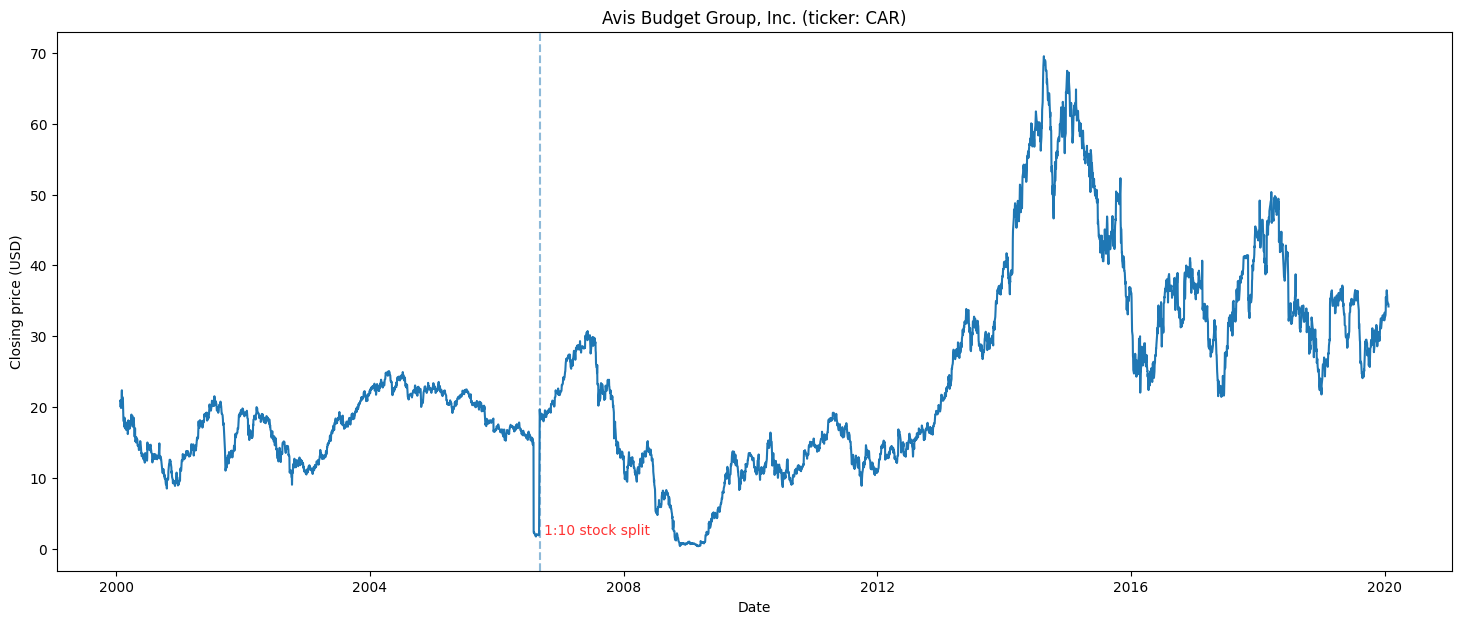

In [52]:
fig, ax = plt.subplots(figsize=(18,7))
ax.plot(df.timestamp.values,df.close)
ax.set(xlabel="Date", ylabel="Closing price (USD)",title='Avis Budget Group, Inc. (ticker: CAR)')

x_line_anno1 = datetime(2006, 9, 6)
x_text_anno1 = datetime(2006, 9, 28)
ax.axvline(x=x_line_anno1, linestyle='dashed', alpha=0.5)
ax.text(x=x_text_anno1, y=2, s='1:10 stock split', alpha=0.8, color='r')


🥦 <font color='red'>TODO</font>: Modify the code above to add another annotation to the chart


Text(2014-08-18 00:00:00, 69.52, 'max close')

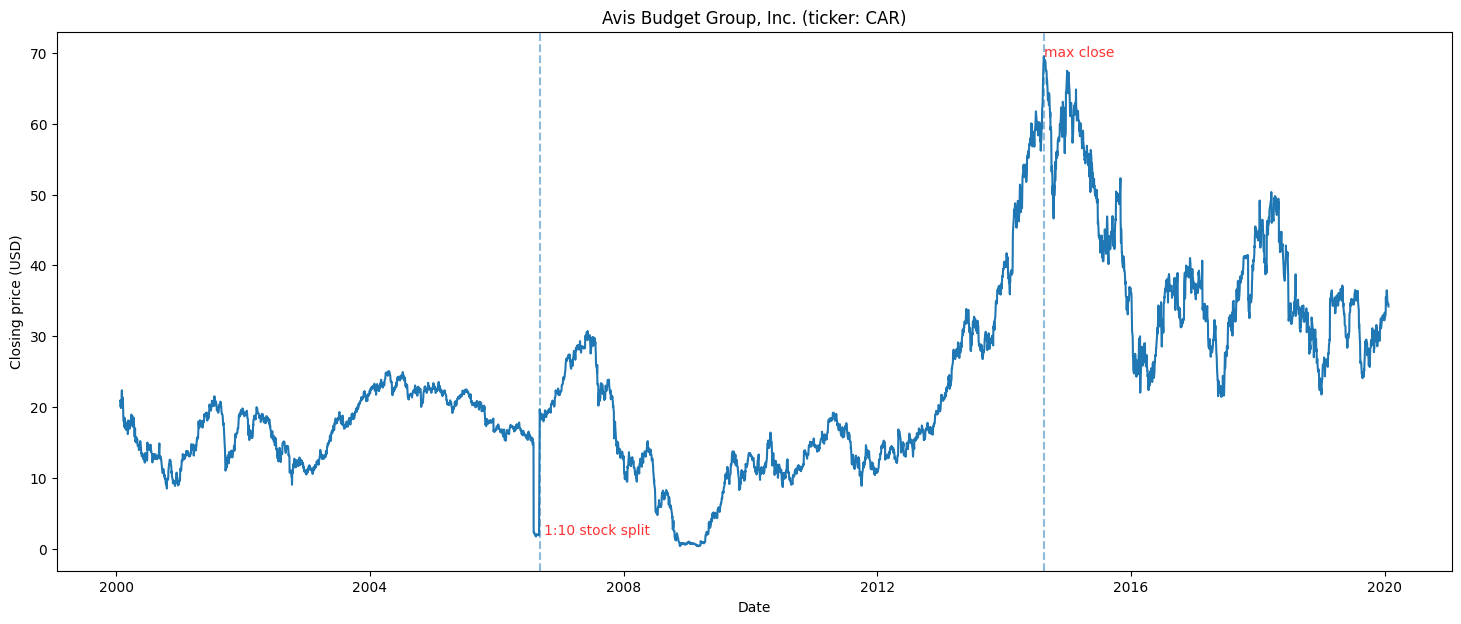

In [55]:
fig, ax = plt.subplots(figsize=(18,7))
ax.plot(df.timestamp.values,df.close)
ax.set(xlabel="Date", ylabel="Closing price (USD)",title='Avis Budget Group, Inc. (ticker: CAR)')

x_line_anno1 = datetime(2006, 9, 6)
x_text_anno1 = datetime(2006, 9, 28)
ax.axvline(x=x_line_anno1, linestyle='dashed', alpha=0.5)
ax.text(x=x_text_anno1, y=2, s='1:10 stock split', alpha=0.8, color='r')

# new:
max_value = df[df.close == df.close.max()].iloc[0]
x_text_anno_max = max_value.timestamp
ax.axvline(x=x_text_anno_max, linestyle='dashed', alpha=0.5)
ax.text(x=x_text_anno_max, y=max_value.close, s='max close', alpha=0.8, color='r')

Let's make the timestamp column our index:

In [56]:
df.set_index('timestamp',inplace=True)

In [57]:
df

,open,high,low,close,volume,symbol
timestamp,,,,,,
2000-01-24,20.44,20.8800,19.870,20.13,29705000,CAR
2000-01-25,20.37,21.1900,20.060,20.94,21124000,CAR
2000-01-26,20.88,21.4400,20.560,20.81,25618000,CAR
2000-01-27,20.56,21.2500,20.560,21.00,20061000,CAR
2000-01-28,20.88,20.8800,19.620,19.87,22720000,CAR
...,...,...,...,...,...,...
2020-01-17,36.05,36.0900,34.770,34.99,632347,CAR
2020-01-21,34.78,35.1200,34.240,34.64,768789,CAR
2020-01-22,34.89,34.9100,34.310,34.51,636539,CAR


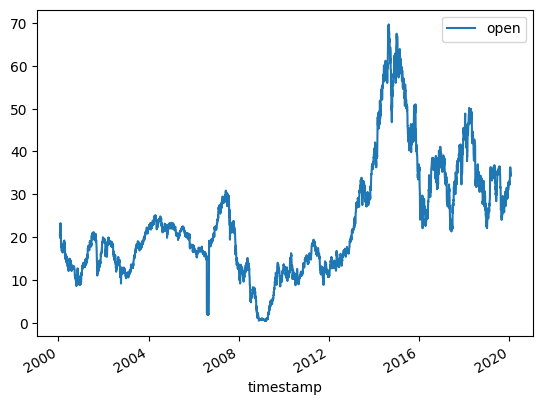

In [58]:
df[['open']].plot()
plt.show()

### Indexing by Timestamp

In [59]:
df['2019-01-01':'2019-01-15']


,open,high,low,close,volume,symbol
timestamp,,,,,,
2019-01-02,22.09,23.0500,21.680,22.71,1314801,CAR
2019-01-03,22.52,22.5200,21.629,21.78,2917457,CAR
2019-01-04,22.18,23.6650,21.720,23.13,2712125,CAR
2019-01-07,23.21,24.0200,22.820,23.93,1273328,CAR
2019-01-08,24.23,24.6800,23.910,24.11,1033750,CAR
2019-01-09,24.16,25.2800,24.040,25.06,1022049,CAR
2019-01-10,24.94,25.8400,24.570,25.57,1134390,CAR
2019-01-11,25.44,26.3065,25.150,26.01,1488313,CAR
2019-01-14,25.58,26.4050,25.250,26.04,751291,CAR


In [60]:
df['2019-01-01':]


,open,high,low,close,volume,symbol
timestamp,,,,,,
2019-01-02,22.09,23.0500,21.680,22.71,1314801,CAR
2019-01-03,22.52,22.5200,21.629,21.78,2917457,CAR
2019-01-04,22.18,23.6650,21.720,23.13,2712125,CAR
2019-01-07,23.21,24.0200,22.820,23.93,1273328,CAR
2019-01-08,24.23,24.6800,23.910,24.11,1033750,CAR
...,...,...,...,...,...,...
2020-01-17,36.05,36.0900,34.770,34.99,632347,CAR
2020-01-21,34.78,35.1200,34.240,34.64,768789,CAR
2020-01-22,34.89,34.9100,34.310,34.51,636539,CAR


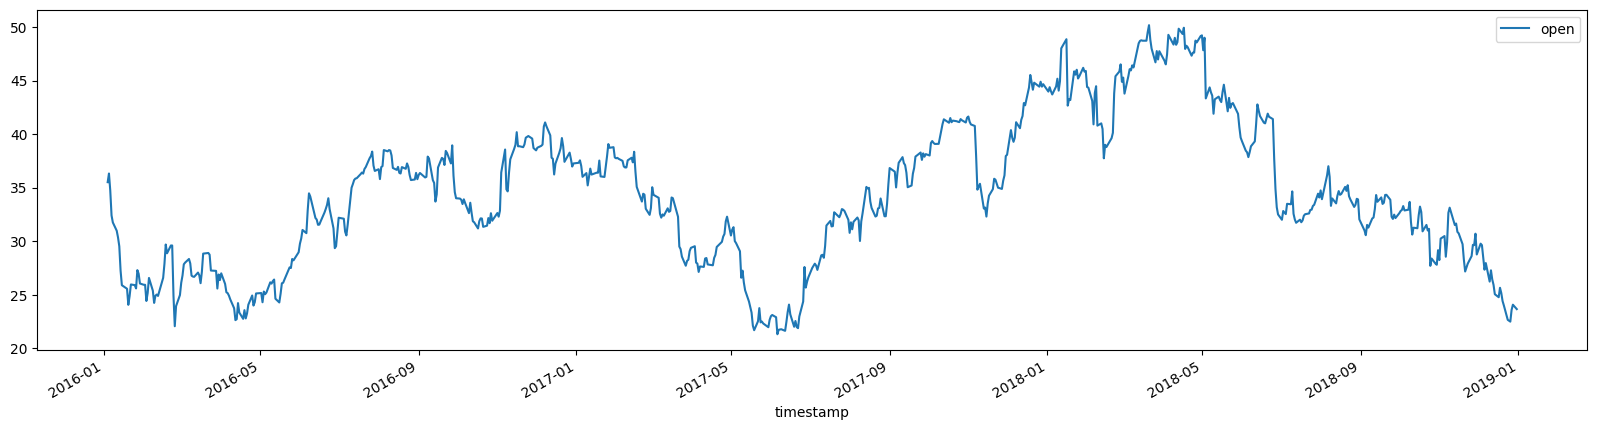

In [61]:
df['2016-01-01':'2018-12-31'][['open']].plot(figsize=(20,5));

🥦 <font color='red'>TODO</font>: Produce a line chart showing the "close" from Jan 1, 2019 onwards.

Hints:
- use the plot function like above
- make sure you use the correct column 
- make sure you use the right time indexing


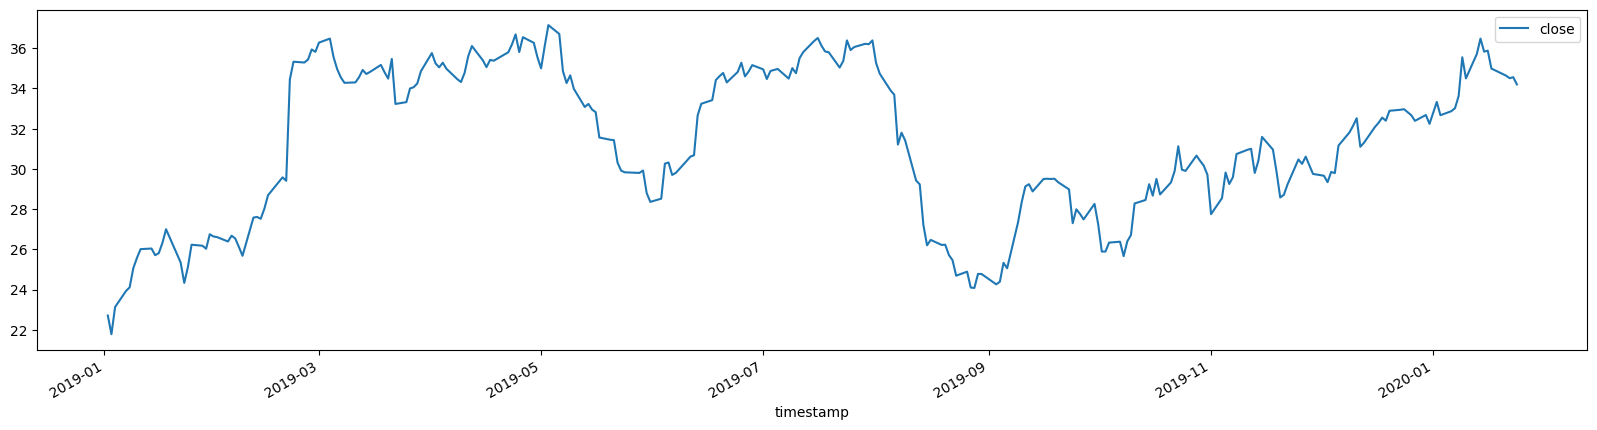

In [63]:
# add your code here
df['2019-01-01':][['close']].plot(figsize=(20,5));

### Rolling window



A rolling window - also known as a sliding window - represents a subset of data points that shifts ("rolls") forward on the time axis of a time series. 


  <img src="https://nico.nexgate.ch/images/rolling.png" width='65%' alt="rolling window" />

In this example, the subset is a tranche of 3 months, for instance from Jan 1 until Mar 31. And the rolling window slides forward. 

🥦 <font color='red'>QUESTION</font>: Why is it interesting to look at rolling windows? In your area of work/research, do you use rolling windows?
--> analysis of data over a moving time frame

### SMA (Simple Moving Average)

Using the rolling() funtion we can calculate a rolling mean for a sliding time period.

The rolling mean - also known as simple moving average - if often used in market data commentary, see example below from Forbes.com

<blockquote>
Bitcoin (BTC) traded above its 200-day simple moving average at 44,847 on Sunday, Aug. 8. The weekly chart for BTC has been positive since the week of Aug. 1. If Bitcoin can stay above its 200-day, its monthly risky level is 63,863. If not, the downside risk is to its semiannual and quarterly pivots at 35,643 and 32,803.

www.forbes.com
</blockquote>

In [64]:
dfo = df['2019-01-01':][['open']].copy()

In [65]:
rolling_90 = dfo[['open']].rolling(90,center=True)
rolling_30 = dfo[['open']].rolling(30,center=True)

In [68]:
rolling_90.mean().index,dfo.index

(DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
                '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
                '2019-01-14', '2019-01-15',
                ...
                '2020-01-10', '2020-01-13', '2020-01-14', '2020-01-15',
                '2020-01-16', '2020-01-17', '2020-01-21', '2020-01-22',
                '2020-01-23', '2020-01-24'],
               dtype='datetime64[ns]', name='timestamp', length=268, freq=None),
 DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
                '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
                '2019-01-14', '2019-01-15',
                ...
                '2020-01-10', '2020-01-13', '2020-01-14', '2020-01-15',
                '2020-01-16', '2020-01-17', '2020-01-21', '2020-01-22',
                '2020-01-23', '2020-01-24'],
               dtype='datetime64[ns]', name='timestamp', length=268, freq=None))

Matplotlib colors documentation:

https://matplotlib.org/stable/gallery/color/named_colors.html

<Figure size 640x480 with 0 Axes>

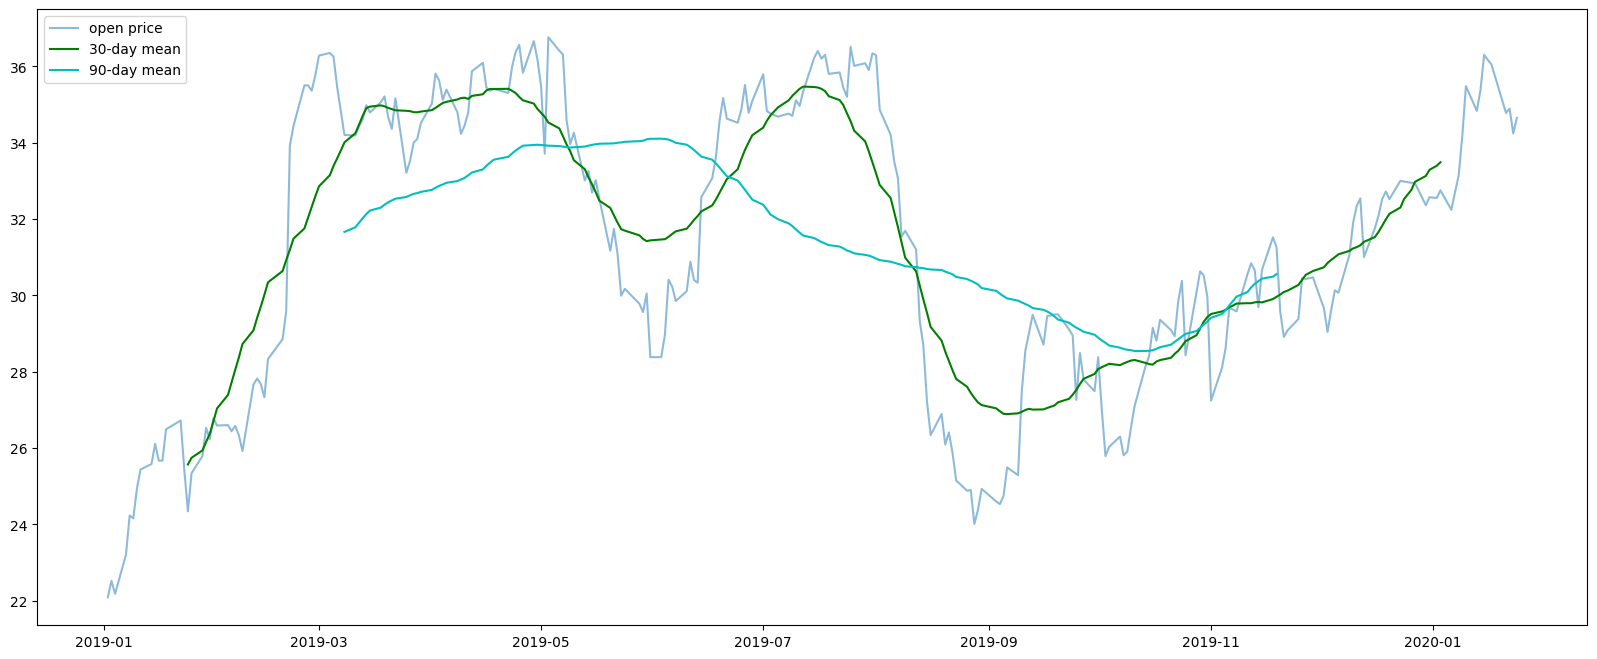

In [69]:

plt.figure().clear()
plt.figure(figsize=(20,8))

plt.plot(list(dfo.index), dfo.open ,alpha=0.5,label='open price') 
plt.plot(list(rolling_30.mean().index), rolling_30.mean(), 'g',label='30-day mean') 
plt.plot(list(rolling_90.mean().index), rolling_90.mean(), 'c',label='90-day mean') 

plt.legend()
plt.show();

🥦 <font color='red'>QUESTION</font>: Why is the light blue line not going all the way from Jan 2019 to Feb 2020?
--> because it requires half of the window for having an avg at all.

### Percentage change

If a stock moves from 1.83 CHF per share on Monday to 0.72 CHF per share on Tuesday,

The actual change is:  0.72 - 1.83 = -1.11 CHF

The percentage change is: (0.72 - 1.82)/1.82 = -60%

🌶️ <font color='red'>QUESTION</font>: Why would we want to look at percentage change vs. actual change?

In [70]:
import numpy as np

amgen_price = pd.Series([67, 122, 173, 202, 221, 217, 254, 271, 285, 293])
print("Amgen share price actual annual change:")
print(amgen_price.diff())
print("Amgen share price percentage annual change:")
print(round(amgen_price.pct_change()*100,2))


Amgen share price actual annual change:
0     NaN
1    55.0
2    51.0
3    29.0
4    19.0
5    -4.0
6    37.0
7    17.0
8    14.0
9     8.0
dtype: float64
Amgen share price percentage annual change:
0      NaN
1    82.09
2    41.80
3    16.76
4     9.41
5    -1.81
6    17.05
7     6.69
8     5.17
9     2.81
dtype: float64


### Using pct_change() on a Time Series

In [71]:
dfo[['open']].pct_change()

,open
timestamp,
2019-01-02,NaN
2019-01-03,0.019466
2019-01-04,-0.015098
2019-01-07,0.046438
2019-01-08,0.043947
...,...
2020-01-17,-0.003318
2020-01-21,-0.035229
2020-01-22,0.003163


## 🌶️ To learn more on Time Series

https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html

In particular, check:

- Frequencies and Offsets
- Resampling, Shifting, and Windowing


## 🌶️ Complex chart example

Using Matplotlib, you can configure your chart to brand it according to your companies guidelines.

The example below illustrates the kind of customizaitons you can do.

- chart size is set
- grid lines are added
- y-axis shows in percentages
- title added
- comment in light grey italic added below the chart
- company logo positioned on the bottom right corner
- save your chart output to a file


In [72]:
# Let's create a fictional dataset with random stock price returns for a couple of companies

rs = np.random.RandomState(364)
values = rs.randn(364, 4).cumsum(axis=0)
values = np.insert(values, 0, [0,0,0,0], axis=0)
dates = pd.date_range("1 1 2020", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["Roche AG", "Sonova AG", "Biogen Ltd.", "Amgen Inc."])

data.tail(3)

,Roche AG,Sonova AG,Biogen Ltd.,Amgen Inc.
2020-12-28,42.282284,-11.854145,0.637721,-5.937474
2020-12-29,41.314188,-12.147141,-0.808558,-6.559851
2020-12-30,42.314308,-11.507658,-1.223055,-5.935499


In [73]:
# Let's use the rolling funciton on our price time series to calculate the 7-day moving average for each company
data = data.rolling(7).mean()
data.tail(3)

,Roche AG,Sonova AG,Biogen Ltd.,Amgen Inc.
2020-12-28,42.852948,-12.173387,0.868091,-6.756246
2020-12-29,42.457513,-12.027327,0.501720,-6.629263
2020-12-30,42.318369,-11.822887,0.377163,-6.489814


the figure size in pixels is: 1700.0 x 700.0 and the dpi is: 100.0


C:\Users\Sam\AppData\Local\Temp\ipykernel_12880\20190783.py:34: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((25, 25), Image.ANTIALIAS)


logo size:  25 x 25
logo_x_pos:  1655.0


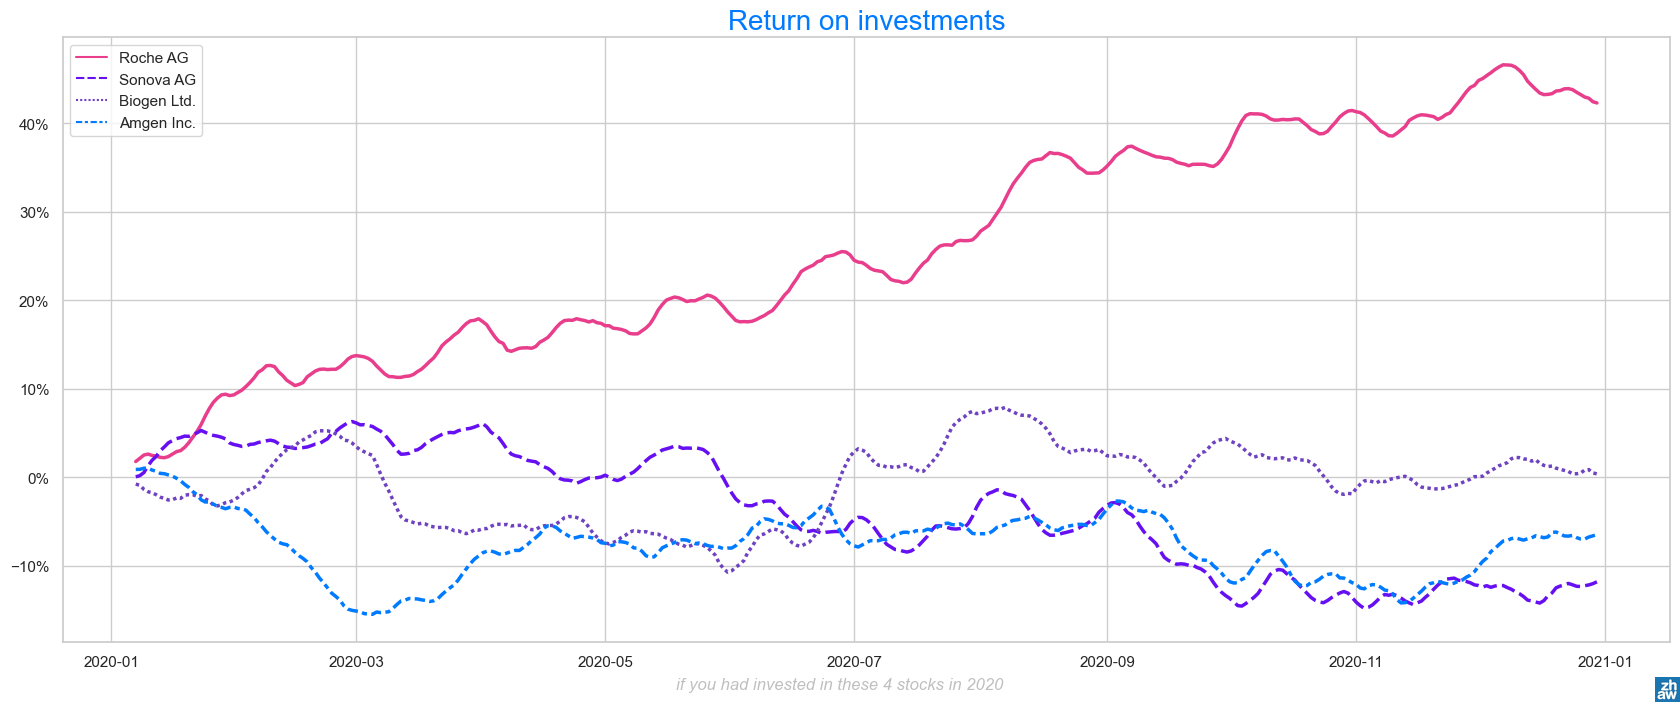

In [74]:

sns.set_theme(style="whitegrid")
# Remap the default palette to your companies colors using hex codes
my_palette = ["#007bff", "#6610f2","#6f42c1","#e83e8c"]
color_codes_wanted = ['blue', 'mauve', 'violet', 'red']
cdict = dict(zip(color_codes_wanted, [mcolors.to_rgba(c) for c in my_palette]))
mcolors.get_named_colors_mapping().update(cdict)

ax = sns.lineplot(data=data,  linewidth=2.5, palette=['red', 'mauve', 'violet', 'blue'])

# format the y axis as percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# adjust the size of the chart
fig = plt.gcf()
fig.set_size_inches(17,7)

# add a title, set the font size and color
ax.set_title("Return on investments", color="blue", fontsize=20)

# add a comment in grey italic below the chart
plt.figtext(0.5, 0.0, 'if you had invested in these 4 stocks in 2020', wrap=True, horizontalalignment='center', fontsize=12, color='grey', alpha=0.5, fontstyle='italic')


# note matplotlib does not work with pixel size. instead if works with physical size and dpi (dots per inch)
# to get the size in pixels, you need to multiple the size (in inches) x the dpi
size_px = fig.get_size_inches()*fig.dpi
print("the figure size in pixels is:", size_px[0],"x",size_px[1], "and the dpi is:", fig.dpi)


# add your company logo to the chart from an image url
response = requests.get('https://nico.nexgate.ch/images/logo.jpg')
img = Image.open(BytesIO(response.content))
# resize the image to 30x30 pixels
img = img.resize((25, 25), Image.ANTIALIAS)
im_width, im_height = img.size
print("logo size: ",im_width, "x",im_height)

# position the logo on the bottom right and adjust the transparency
logo_x_pos = size_px[0] - im_width -20
print("logo_x_pos: ", logo_x_pos)
logo_y_pos = 0

fig.figimage(img, xo = logo_x_pos, yo = logo_y_pos,alpha =.9)

fig.tight_layout(rect=(0, 0, 1, 1),pad=1.2) 
plt.show();

# save the chart as a png file
fig.savefig('chart.png', bbox_inches="tight", pad_inches=0.5,dpi=fig.dpi)


## 🌶️🌶️ Encrypting data (optional content)

In some situations, you need to share data with a counterpart but you are restricted by a NDA, GDPR or other data protection schemes.

You can create an encrypted version of your data if you want to share the data without sharing specific information such as names of data subjects.

<font color='red'><b>WARNING</b></font>: 

In some cases, encryption is not sufficient. Think about the example below. In order to protect the personal data of employees, we are encrypting the names of the employees.

non-encrypted data:
<pre>
Name, Rank, Salary
Zoe, CEO, 1200000
Tania, Head of Finance, 345000
Misha, Data Scientist, 134000
...
</pre>

encrypted data:
<pre>
Name, Rank, Salary
ae55bdfc-7163-444a-8c0a-37a798996045, 8a285c1-085e-4b8f-822b-853323c6d7b4, 1200000
57eaa3ee-dc80-48eb-be20-d37b6a5e6f0c, 28a285c1-085e-4b8f-822b-853323c6d7b4, 345000
f31a27e3-5ef3-443d-a410-2fd60eff8611, b8ab4183-125a-42f9-ab93-7a4f805dbe34, 134000
...
</pre>

🌶️ <font color='red'>Question</font>: What's wrong with this data encryption approach?


In [75]:
from uuid import uuid4
import csv

aminos = ['amino acid 1', 'amino acid 1', 'amino acid 2', 'amino acid 2','amino acid 2','amino acid 3','amino acid 3','amino acid 3']

aminos = set(aminos)

aminos

{'amino acid 1', 'amino acid 2', 'amino acid 3'}

In [76]:
# iterators: for, while

print('Unique values of amino acids: ',aminos)

amino_dictionary = {}

for amino in aminos:
    unique_id = str(uuid4())
    amino_dictionary[amino]=unique_id

print('My dictionaty of encrypted IDs for amino acids',amino_dictionary)




Unique values of amino acids:  {'amino acid 2', 'amino acid 1', 'amino acid 3'}
My dictionaty of encrypted IDs for amino acids {'amino acid 2': '4f9cbc41-ce56-4649-a0e6-8c7c108d90bb', 'amino acid 1': '40d0398d-fdd6-46f6-94a3-14a72e00387d', 'amino acid 3': '1ef1854f-46a0-4ab6-b43e-4620b283186f'}


In [ ]:

csv_file = "amino_dictionary.csv"
csv_columns = ['Amino_acid','ID']


with open(csv_file, 'w') as f:
    f.write("Amino,Key\n")
    for key in amino_dictionary.keys():
        f.write("%s,%s\n"%(key,amino_dictionary[key]))

print('Dictionary saved to ',csv_file)

```
!cat amino_dictionary.csv
```

Output:

```
Amino,Key
amino acid 3,4c20a0ff-8570-4839-a268-9d11b22d1a94
amino acid 2,250f4262-f9ee-4f44-bd0f-ad47af0225e7
amino acid 1,c4670199-4868-43c4-b95a-9799b5003320
```

## 🌶️🌶️ Web scraping (optional content)


In this course, we mostly look at existing datasets - such as csv or excel files - which are either available on your laptop or hosted on a web server.

These datasets are mostly static. 

It is also possible to collect dynamic data using a technique called web scraping. Web scraping refers to the process of extracting data from the internet and typically involves parsing the content of a web site and/or using a web service to request specific data.

In the example below, we retrieve the change in atmospheric pressure, temperature and wind speed from the weather station in Wädenswil from the Swiss geo data public web site. In order to do that, we need to pass some parameters - such as the code used to identify a specific weather station - and we then extract the specific data elements we are interested in. 

Sources: 

https://data.geo.admin.ch/

https://www.meteoschweiz.admin.ch/


In [77]:
# Import libraries
import pandas as pd

url_pressure = 'https://data.geo.admin.ch/ch.meteoschweiz.messwerte-luftdruck-differenz-3h/ch.meteoschweiz.messwerte-luftdruck-differenz-3h_fr.csv'
url_wind = 'https://data.geo.admin.ch/ch.meteoschweiz.messwerte-windgeschwindigkeit-kmh-10min/ch.meteoschweiz.messwerte-windgeschwindigkeit-kmh-10min_fr.csv'
url_temp = 'https://data.geo.admin.ch/ch.meteoschweiz.messwerte-lufttemperatur-10min/ch.meteoschweiz.messwerte-lufttemperatur-10min_fr.csv'
  


In [78]:
# Get the atmospheric pressure delta data

df = pd.read_csv(url_pressure,delimiter=';',encoding='latin-1')  

# the Wädenswil weather station is identified by the code "WAE"
# and the column "Pression hPa" contains the change in atmospheric pressure over the 3 hours
change_in_pression = df[df['Abr.']=='WAE']['Pression hPa'].iloc[0]
        
print("Change in pressure: " + str(change_in_pression))   
      


Change in pressure: -1.2


In [79]:
# Get the wind speed data

dfv = pd.read_csv(url_wind,
                  sep=';',
  				  encoding='latin-1')  

current_wind = dfv[dfv['Abr.']=='WAE']['Vent km/h'].iloc[0]

print("Wind: " + str(current_wind) + ' hm/h')   

  

Wind: 6.5 hm/h


In [ ]:
# Get the air temperature data

dft = pd.read_csv(url_temp,
                  sep=';',encoding='latin-1')  
  
  
current_temp = dft[dft['Abr.']=='WAE'].iloc[0,3]
  
s = f"Temperature: {current_temp:.1f} C"
print(s)  
         

In [ ]:
# Get the time stamp on the last data collection from the weather station

as_of = dft[dft['Abr.']=='WAE'].iloc[0,4] 

print("Weather data as of: ", as_of)

Once we have the data in Python, we can also use this data to create a mobile app or publish the data online.

As an example, the Python code above was embedded on a web page using PyScript.

You can test it at the URL: https://nico.nexgate.ch/sail.html

reference: https://pyscript.net/


### 🌶️ Scraping financial data

Here are 2 data sites where you can retrieve financial market data:

Quandl http://www.quandl.com (market data sets)

Finbox screener https://finbox.com/screener (data universe screener)



## 🥑 Ask chatGTP

<u>QUESTION</u>: 

when should I use a line chart vs. a distribution chart vs. a scatter plot vs. a pair plot chart?

<u>ANSWER FROM ChatGTP</u>:

Line charts, distribution charts, scatter plots, and pair plots are all effective tools for visualizing different types of data. Here's a brief overview of when to use each of them:

**Line charts**: Line charts are useful for showing **trends over time** or for comparing the changes in two or more variables. They are particularly effective for displaying continuous data that is ordered by time or some other sequence. Line charts are also useful for displaying patterns or trends in data sets with a large number of data points.

**Distribution charts**: Distribution charts, also known as histogram charts or frequency charts, are useful for displaying the **distribution of a single variable**. They show the number of observations that fall into different intervals or "bins" of the variable. Distribution charts are particularly useful for identifying patterns in data sets with a large number of data points, or for displaying the shape of the distribution of a variable.

**Scatter plots**: Scatter plots are useful for **displaying the relationship between two variables**. They show how the values of one variable change in response to changes in the values of another variable. Scatter plots are particularly useful for identifying patterns or trends in data sets with a **large number of data points**, or for identifying **outliers** or unusual data points.

**Pair plot** charts: Pair plot charts, also known as scatterplot matrices, are useful for **displaying the relationship between multiple variables**. They show scatter plots of all possible combinations of pairs of variables in a data set. Pair plot charts are particularly useful for identifying patterns or trends in complex data sets with multiple variables, or for identifying relationships between variables that may not be immediately apparent from individual scatter plots.

⚠️ <font color=blue>In general, the choice of chart type depends on the **type of data** you have and the **questions you want to answer** with your visualization. It's important to consider the strengths and weaknesses of each type of chart before deciding which one to use.</font>

Nic's comments: 

- Consider the data literacy level of your target audience, e.g. not everyone may be familiar with boxplots. 
- Think about the psychological askpects of data visualization. The book *Thinking, Fast and Slow by Daniel Kahneman* is a great place to start. It covers the way human beings form jugements and make choices.

 <img src="https://nico.nexgate.ch/images/thinking.jpeg" width='15%' alt="book3" />

- Think about the ethical and moral aspects of data visisualization. Choosing to show certain data points often guides and influences your audience. Therefor the onus is on you to make sure you consider ethical aspects related amongst other things to data privacy and discimination. On this, I recommend the book: **Human-Centered Data Science** by Cecilia Aragon, Shion Guha, Marina Kogan, Michael Muller and Gina Neff.

 <img src="https://nico.nexgate.ch/images/human-centered.avif" width='15%' alt="book3" />


<u>QUESTION</u>: what are the tpye of charts used for data analysis and what is each  chart used for?


<u>ANSWER FROM ChatGTP</u>:

There are many different types of charts used for data analysis. Here's a brief overview of some of the most common types of charts and what each chart is used for:

**Bar charts**: Bar charts are used to display the **distribution of categorical data**. They are often used to compare the frequency or proportion of different categories or groups.

Line charts: Line charts are used to display trends in data over time. They are often used to show changes in a variable over a period of time or to compare the performance of two or more variables over time.

Scatter plots: Scatter plots are used to display the relationship between two continuous variables. They are often used to identify patterns or trends in the data and to identify any outliers or unusual data points.

Pie charts: Pie charts are used to display the proportion of a whole that is accounted for by each category or group. They are often used to display the relative sizes of different categories or groups.

Area charts: Area charts are similar to line charts but display the area between the line and the x-axis. They are often used to display changes in a variable over time or to compare the performance of two or more variables over time.

**Box plots**: Box plots are used to display the **distribution of continuous data**. They show the median, quartiles, and any **outliers** in the data.

Histograms: Histograms are used to display the distribution of continuous data. They show the frequency or proportion of observations that fall into different intervals or "bins" of the variable.

**Heat maps**: Heat maps are used to display the **relationship between two categorical variables**. They show the frequency or proportion of observations that fall into each combination of categories.

Bubble charts: Bubble charts are similar to scatter plots but display an additional variable by varying the size of the bubbles. They are often used to display the relationship between three variables.

<u>QUESTION</u>: why do some people advise against the use of pie charts?

<u>ANSWER FROM ChatGTP</u>:

There are a few reasons why some people advise against using pie charts:

⚠️  Difficult to compare: Pie charts can make it difficult to accurately compare different categories or values. It can be hard to determine the exact differences between two slices of a pie chart, especially if the slices are similar in size or color.

⚠️  Limited number of slices: Pie charts are best used for showing data with a small number of categories. As the number of categories increases, the chart becomes more cluttered and difficult to read.

⚠️  Limited precision: Pie charts are not as precise as other charts, such as bar graphs or line graphs, because they do not show the exact numerical values of the data.

⚠️ Misleading: Pie charts can be misleading if the slices are not accurately sized or labeled. It is important to ensure that the slices are proportional to the data they represent and that they are labeled clearly.

Overall, while pie charts can be visually appealing, they may not always be the most effective way to represent data. Other types of charts, such as **bar graphs** or **line graphs**, may be more appropriate